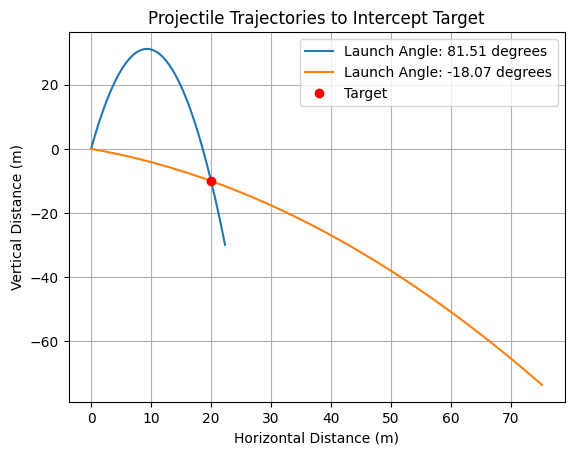

In [26]:
#with help from chatGPT 3.5
#launch angle finder
#OPEN SOURCE no citations or inclusions required

import numpy as np
import matplotlib.pyplot as plt

def calculate_launch_angle(x, y, v0):
    g = 9.81  # Acceleration due to gravity
    discriminant = v0**4 - g * (g * x**2 + 2 * y * v0**2)
    if discriminant < 0:
        return None  # No real solution
    else:
        theta1 = np.arctan((v0**2 + np.sqrt(discriminant)) / (g * x))
        theta2 = np.arctan((v0**2 - np.sqrt(discriminant)) / (g * x))
        return theta1, theta2

def plot_arcs(x, y, v0, ax):
    launch_angles = calculate_launch_angle(x, y, v0)
    if launch_angles is None:
        print("No real solution for launch angle.")
        return

    for theta in launch_angles:
        if theta>0:
            t_max = 2 * v0 * np.sin(theta) / 9.81
            t = np.linspace(0, t_max*1.2, num=100)
            x_traj = v0 * np.cos(theta) * t
            y_traj = v0 * np.sin(theta) * t - 0.5 * 9.81 * t**2
            ax.plot(x_traj, y_traj, label=f"Launch Angle: {np.degrees(theta):.2f} degrees")
        else:
            t_max = 2 * v0 * np.sin(theta) / 9.81
            t = np.linspace(0, t_max*2, num=100)
            x_traj = v0 * -np.cos(theta) * t
            y_traj = v0 * -np.sin(theta) * t - 0.5 * 9.81 * t**2
            ax.plot(x_traj, y_traj, label=f"Launch Angle: {np.degrees(theta):.2f} degrees")

    ax.plot(x, y, 'ro', label="Target")
    ax.set_xlabel("Horizontal Distance (m)")
    ax.set_ylabel("Vertical Distance (m)")
    ax.set_title("Projectile Trajectories to Intercept Target")
    ax.legend()
    ax.grid(True)


# Target coordinates
target_x = 20
target_y = -10

# Initial velocity of the projectile
initial_velocity = 25  # m/s

fig, ax = plt.subplots()
plot_arcs(target_x, target_y, initial_velocity, ax)
plt.show()

